In [1]:
import pandas as pd

# Cargar los datasets
items_df = pd.read_csv('items_pr.csv')
user_reviews_df = pd.read_csv('user_reviews_pr.csv')
steam_games_df = pd.read_csv('steam_games_pr.csv')

# Mostrar las primeras filas de cada dataset
items_df_head, user_reviews_df_head, steam_games_df_head = items_df.head(), user_reviews_df.head(), steam_games_df.head()

items_df_head, user_reviews_df_head, steam_games_df_head


(             user_id  items_count           steam_id   
 0  76561198130206911           46  76561198130206911  \
 1              0-3-0          139  76561198082114662   
 2         Rubbercube           87  76561198061115484   
 3   NocturnalKnight2          231  76561198045153922   
 4  76561198090489010           34  76561198090489010   
 
                                             user_url   item_id   
 0  http://steamcommunity.com/profiles/76561198130...  247120.0  \
 1                 http://steamcommunity.com/id/0-3-0   15620.0   
 2            http://steamcommunity.com/id/Rubbercube  354140.0   
 3      http://steamcommunity.com/id/NocturnalKnight2   34460.0   
 4  http://steamcommunity.com/profiles/76561198090...     220.0   
 
                                        item_name  playtime_forever   
 0               Portal 2 Sixense Perceptual Pack               1.0  \
 1            Warhammer® 40,000™: Dawn of War® II               0.0   
 2                      Five Nights at 

In [2]:
from textblob import TextBlob

def sentiment_analysis(text):
    try:
        analysis = TextBlob(text)
        # Clasificar el análisis de sentimiento
        if analysis.sentiment.polarity > 0.1:  # Consideramos una reseña positiva si la polaridad es mayor a 0.1
            return 2
        elif analysis.sentiment.polarity < -0.1:  # Consideramos una reseña negativa si la polaridad es menor a -0.1
            return 0
        else:
            return 1  # Neutral
    except:
        return 1  # Neutral en caso de no poder analizar

# Aplicar análisis de sentimiento a la columna 'review'
user_reviews_df['sentiment_analysis'] = user_reviews_df['review'].apply(sentiment_analysis)

# Mostrar las primeras filas del dataset actualizado
user_reviews_df_head_updated = user_reviews_df.head()
user_reviews_df_head_updated


,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url,sentiment_analysis
0,1 person found this review funny,"Posted May 13, 2014.",NaN,730,3 of 3 people (100%) found this review helpful,True,PEW PEW PEW PEW PEWPEW PEW PEW PEW PEWPEW PEW ...,Skillbot123,http://steamcommunity.com/id/Skillbot123,1
1,NaN,"Posted December 6, 2011.","Last edited September 28, 2015.",41070,2 of 4 people (50%) found this review helpful,True,Awesome Action FPS!! Certainly picks up from t...,Rawex,http://steamcommunity.com/id/Rawex,2
2,1 person found this review funny,"Posted October 16, 2015.",NaN,218620,5 of 5 people (100%) found this review helpful,False,"Pay2Win, Overkill greed company dont buy this ...",agusdemyx25,http://steamcommunity.com/id/agusdemyx25,0
3,NaN,"Posted March 5, 2014.",NaN,49520,No ratings yet,True,"Amazing re-playable campaing, amazing guns tha...",76561198026614455,http://steamcommunity.com/profiles/76561198026...,1
4,NaN,"Posted April 3, 2014.",NaN,35720,No ratings yet,True,Trine 2 is a beautiful game with charming char...,76561198071786753,http://steamcommunity.com/profiles/76561198071...,2


<Figure size 1400x800 with 0 Axes>

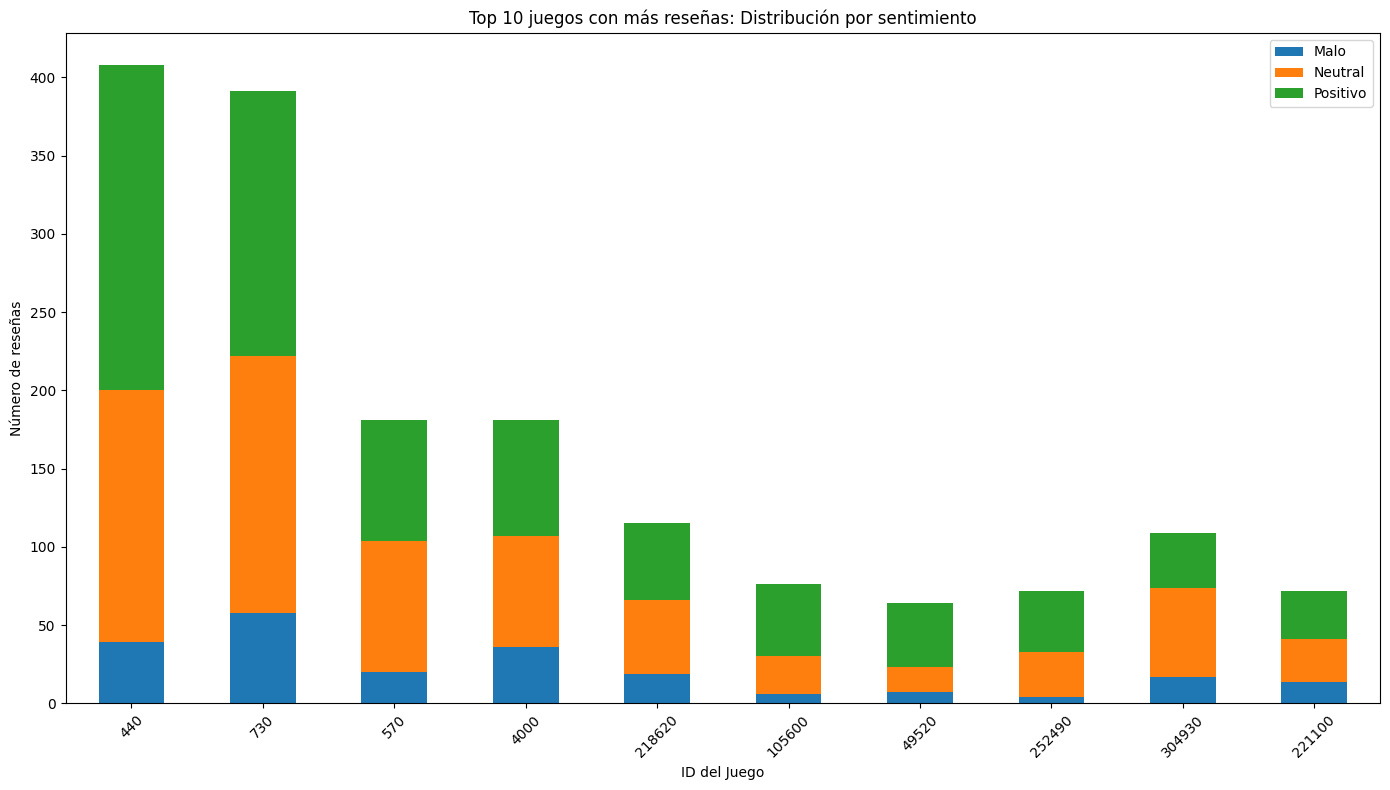

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por item_id y sentimiento para obtener el conteo de reseñas por sentimiento para cada juego
sentiment_distribution = user_reviews_df.groupby(['item_id', 'sentiment_analysis']).size().unstack().fillna(0)

# Ordenar por sentimiento positivo
sentiment_distribution = sentiment_distribution.sort_values(by=2, ascending=False).head(10)

# Gráfico
plt.figure(figsize=(14, 8))
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top 10 juegos con más reseñas: Distribución por sentimiento')
plt.ylabel('Número de reseñas')
plt.xlabel('ID del Juego')
plt.xticks(rotation=45)
plt.legend(["Malo", "Neutral", "Positivo"], loc='upper right')
plt.tight_layout()
plt.show()


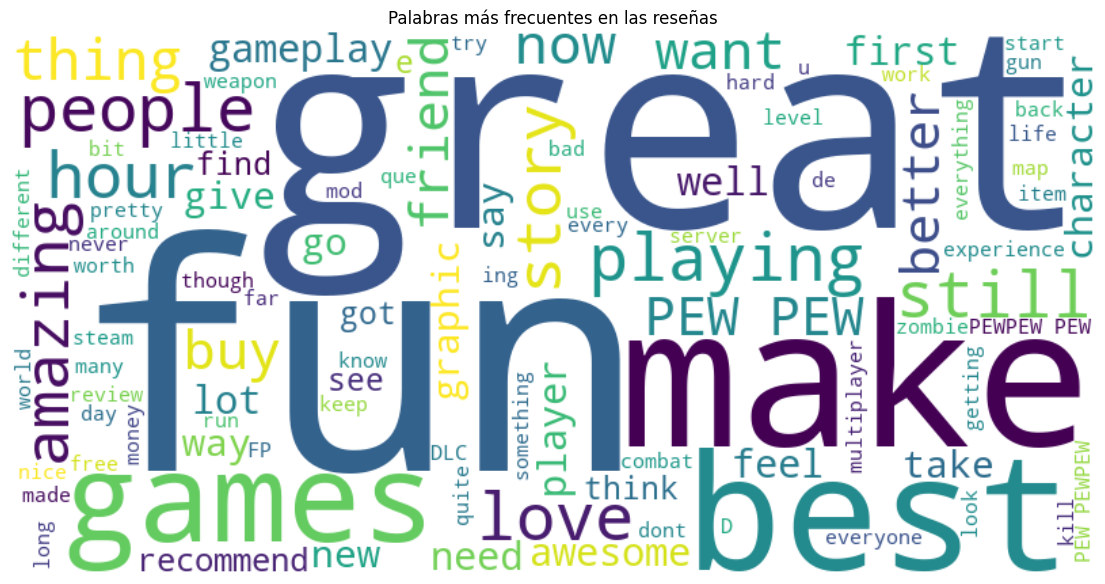

In [6]:
from wordcloud import WordCloud, STOPWORDS

# Concatenar todas las reseñas en una sola cadena de texto
all_reviews = ' '.join(user_reviews_df['review'].dropna())

# Configurar stopwords (palabras que no queremos incluir en la nube de palabras)
stopwords = set(STOPWORDS)
stopwords.update(["game", "play", "one", "really", "like", "even", "get", "good", "much", "time", "will", "played"])

# Crear nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, width=800, height=400).generate(all_reviews)

# Mostrar nube de palabras
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palabras más frecuentes en las reseñas")
plt.show()



In [71]:
# Tomar una muestra aleatoria del 10% de los usuarios e ítems
sampled_items_df = items_df.sample(frac=0.1, random_state=42)

# Crear la matriz de usuario-ítem con la muestra
sampled_user_item_matrix = sampled_items_df.pivot_table(index='user_id', columns='item_id', values='playtime_forever', fill_value=0)

# Normalizar la matriz (centrar los valores en 0)
sampled_user_item_matrix_normalized = sampled_user_item_matrix - sampled_user_item_matrix.mean(axis=0)

# Mostrar las primeras filas de la matriz de usuario-ítem con la muestra
sampled_user_item_matrix_normalized.head()


item_id,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,100.0,130.0,...,497810.0,497811.0,506140.0,508600.0,510050.0,517910.0,523326.0,523482.0,523483.0,523790.0
user_id,,,,,,,,,,,,,,,,,,,,,
00690069006900,-0.718371,-0.010832,-0.237002,0.0,-0.076473,-0.000867,-0.535529,-3.444324,-0.063908,-0.055893,...,0.0,0.0,-0.000217,0.0,0.0,0.0,0.0,0.0,-0.00065,0.0
0071945,-0.718371,-0.010832,-0.237002,0.0,-0.076473,-0.000867,-0.535529,-3.444324,-0.063908,-0.055893,...,0.0,0.0,-0.000217,0.0,0.0,0.0,0.0,0.0,-0.00065,0.0
01221733,-0.718371,-0.010832,-0.237002,0.0,-0.076473,-0.000867,-0.535529,-3.444324,-0.063908,-0.055893,...,0.0,0.0,-0.000217,0.0,0.0,0.0,0.0,0.0,-0.00065,0.0
018302,-0.718371,-0.010832,-0.237002,0.0,-0.076473,-0.000867,-0.535529,-3.444324,-0.063908,-0.055893,...,0.0,0.0,-0.000217,0.0,0.0,0.0,0.0,0.0,-0.00065,0.0
04061993,-0.718371,-0.010832,-0.237002,0.0,-0.076473,-0.000867,-0.535529,-3.444324,-0.063908,-0.055893,...,0.0,0.0,-0.000217,0.0,0.0,0.0,0.0,0.0,-0.00065,0.0


In [10]:
# Crear matriz de usuarios e ítems utilizando pivot_table
user_item_matrix = user_reviews_df.pivot_table(index='user_id', columns='item_id', values='sentiment_analysis', aggfunc='mean')

# Rellenar valores NaN con 1 (Neutral)
user_item_matrix = user_item_matrix.fillna(1)

# Mostrar las primeras filas de la matriz
user_item_matrix.head()


item_id,10,20,30,70,80,220,240,280,300,320,...,493370,495890,496300,497850,498580,499440,503300,512300,521430,521570
user_id,,,,,,,,,,,,,,,,,,,,,
-2SV-vuLB-Kg,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
-SEVEN-,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
-Ultrix,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
-Zovix-,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01189958889189157253,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la similitud del coseno entre ítems
item_similarity = cosine_similarity(user_item_matrix.T)

# Convertir en DataFrame para facilitar las operaciones
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Mostrar una porción de la matriz de similitud
item_similarity_df.iloc[:5, :5]


item_id,10,20,30,70,80
item_id,,,,,
10,1.000000,1.000000,1.000000,0.999805,0.999902
20,1.000000,1.000000,1.000000,0.999805,0.999902
30,1.000000,1.000000,1.000000,0.999805,0.999902
70,0.999805,0.999805,0.999805,1.000000,0.999707
80,0.999902,0.999902,0.999902,0.999707,1.000000


In [72]:
item_similarity_df

item_id,10,20,30,70,80,220,240,280,300,320,...,493370,495890,496300,497850,498580,499440,503300,512300,521430,521570
item_id,,,,,,,,,,,,,,,,,,,,,
10,1.000000,1.000000,1.000000,0.999805,0.999902,0.998733,0.999221,1.000000,0.999805,1.000000,...,0.999902,1.000000,0.999902,1.000000,0.999902,0.999902,0.999902,1.000000,1.000000,0.999902
20,1.000000,1.000000,1.000000,0.999805,0.999902,0.998733,0.999221,1.000000,0.999805,1.000000,...,0.999902,1.000000,0.999902,1.000000,0.999902,0.999902,0.999902,1.000000,1.000000,0.999902
30,1.000000,1.000000,1.000000,0.999805,0.999902,0.998733,0.999221,1.000000,0.999805,1.000000,...,0.999902,1.000000,0.999902,1.000000,0.999902,0.999902,0.999902,1.000000,1.000000,0.999902
70,0.999805,0.999805,0.999805,1.000000,0.999707,0.998538,0.999026,0.999805,0.999609,0.999805,...,0.999707,0.999805,0.999707,0.999805,0.999707,0.999707,0.999707,0.999805,0.999805,0.999707
80,0.999902,0.999902,0.999902,0.999707,1.000000,0.998635,0.999123,0.999902,0.999707,0.999902,...,0.999805,0.999902,0.999805,0.999902,0.999805,0.999805,0.999805,0.999902,0.999902,0.999805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499440,0.999902,0.999902,0.999902,0.999707,0.999805,0.998635,0.999123,0.999902,0.999707,0.999902,...,0.999805,0.999902,0.999805,0.999902,0.999805,1.000000,0.999805,0.999902,0.999902,0.999805
503300,0.999902,0.999902,0.999902,0.999707,0.999805,0.998635,0.999123,0.999902,0.999707,0.999902,...,0.999805,0.999902,0.999805,0.999902,0.999805,0.999805,1.000000,0.999902,0.999902,0.999805
512300,1.000000,1.000000,1.000000,0.999805,0.999902,0.998733,0.999221,1.000000,0.999805,1.000000,...,0.999902,1.000000,0.999902,1.000000,0.999902,0.999902,0.999902,1.000000,1.000000,0.999902


In [75]:
def recomendacion_juego_updated(item_id, n_recommendations=5):
    # Obtener los juegos más similares al dado
    similar_games = item_similarity_df[item_id].sort_values(ascending=False)
    
    # Filtrar solo los juegos que estén en steam_games_df y obtener los top n_recommendations
    similar_games = similar_games[similar_games.index.isin(steam_games_df['id'])].head(n_recommendations + 1)
    
    # Excluir el mismo juego de la lista de recomendados
    similar_games = similar_games.drop(item_id, errors='ignore')
    
    # Obtener nombres de los juegos recomendados
    recommended_game_names = steam_games_df.set_index('id').loc[similar_games.index]['app_name'].tolist()
    
    return recommended_game_names

# Prueba con un juego específico (por ejemplo, el juego con ID 10)
recommended_games_updated = recomendacion_juego_updated(499440)

recommended_games_updated


['Canyon Capers',
 'LYNE',
 'EVGA Precision XOC',
 'American Truck Simulator',
 'Sniper Art of Victory',
 'Blood: One Unit Whole Blood']

In [76]:
from fastapi import FastAPI, HTTPException

app = FastAPI()

@app.get("/recommend_game/")
def get_game_recommendations(item_id: int, n_recommendations: int = 5):
    """Endpoint para obtener recomendaciones de juegos basadas en un juego dado."""
    
    # Verificar si el item_id existe en item_similarity_df
    if item_id not in item_similarity_df.index:
        raise HTTPException(status_code=404, detail="Item no encontrado")
    
    # Obtener los juegos más similares al dado
    similar_games = item_similarity_df[item_id].sort_values(ascending=False)
    
    # Filtrar solo los juegos que estén en steam_games_df y obtener los top n_recommendations
    similar_games = similar_games[similar_games.index.isin(steam_games_df['id'])].head(n_recommendations + 1)
    
    # Excluir el mismo juego de la lista de recomendados
    similar_games = similar_games.drop(item_id, errors='ignore')
    
    # Obtener nombres de los juegos recomendados
    recommended_game_names = steam_games_df.set_index('id').loc[similar_games.index]['app_name'].tolist()
    
    return {"recommended_games": recommended_game_names}


In [77]:
recommended_games_updated = recomendacion_juego_updated(499440)

recommended_games_updated


['Canyon Capers',
 'LYNE',
 'EVGA Precision XOC',
 'American Truck Simulator',
 'Sniper Art of Victory',
 'Blood: One Unit Whole Blood']

In [78]:
# Guardar item_similarity_df en CSV
item_similarity_df.to_csv("item_similarity_ML.csv")

# Guardar steam_games_df en CSV
steam_games_df.to_csv("steam_games_ML.csv")


In [79]:
# Tomar una muestra aleatoria del 80% de item_similarity_df
sample_item_similarity_df = item_similarity_df.sample(frac=0.8, random_state=42)

# Guardar la muestra en un archivo CSV
sample_item_similarity_df.to_csv("item_similarity_df_ML.csv")
